In [1]:
import pandas as pd

df = pd.read_csv('../Datasets/clean_dataset.csv')


In [2]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


**Here's a quick summary of the features**

- Gender, Married, BankCustomer, PriorDefault, Employed, DriversLicense, Approved: These appear to be binary (0 or 1) indicating categorical variables.
- Age, Debt, YearsEmployed, CreditScore, Income: Numerical features that represent various financial metrics.
- Industry, Ethnicity, Citizen: Categorical non-binary features that may need encoding if we're to use them in SVM models.
- ZipCode: This might represent geographical information, which could be treated as a categorical feature or dropped based on its relevance to the model's performance.

In [4]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [5]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values and their count
missing_values_summary = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_summary


Series([], dtype: int64)

In [6]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [7]:
# Check for imbalanced class distribution
class_distribution = df['Approved'].value_counts(normalize=True)
class_distribution

Approved
0    0.555072
1    0.444928
Name: proportion, dtype: float64

Imbalanced Class Distribution: The target variable Approved shows a relatively balanced distribution with 55.5% of the entries not approved (0) and 44.5% approved (1). While there is a slight imbalance.

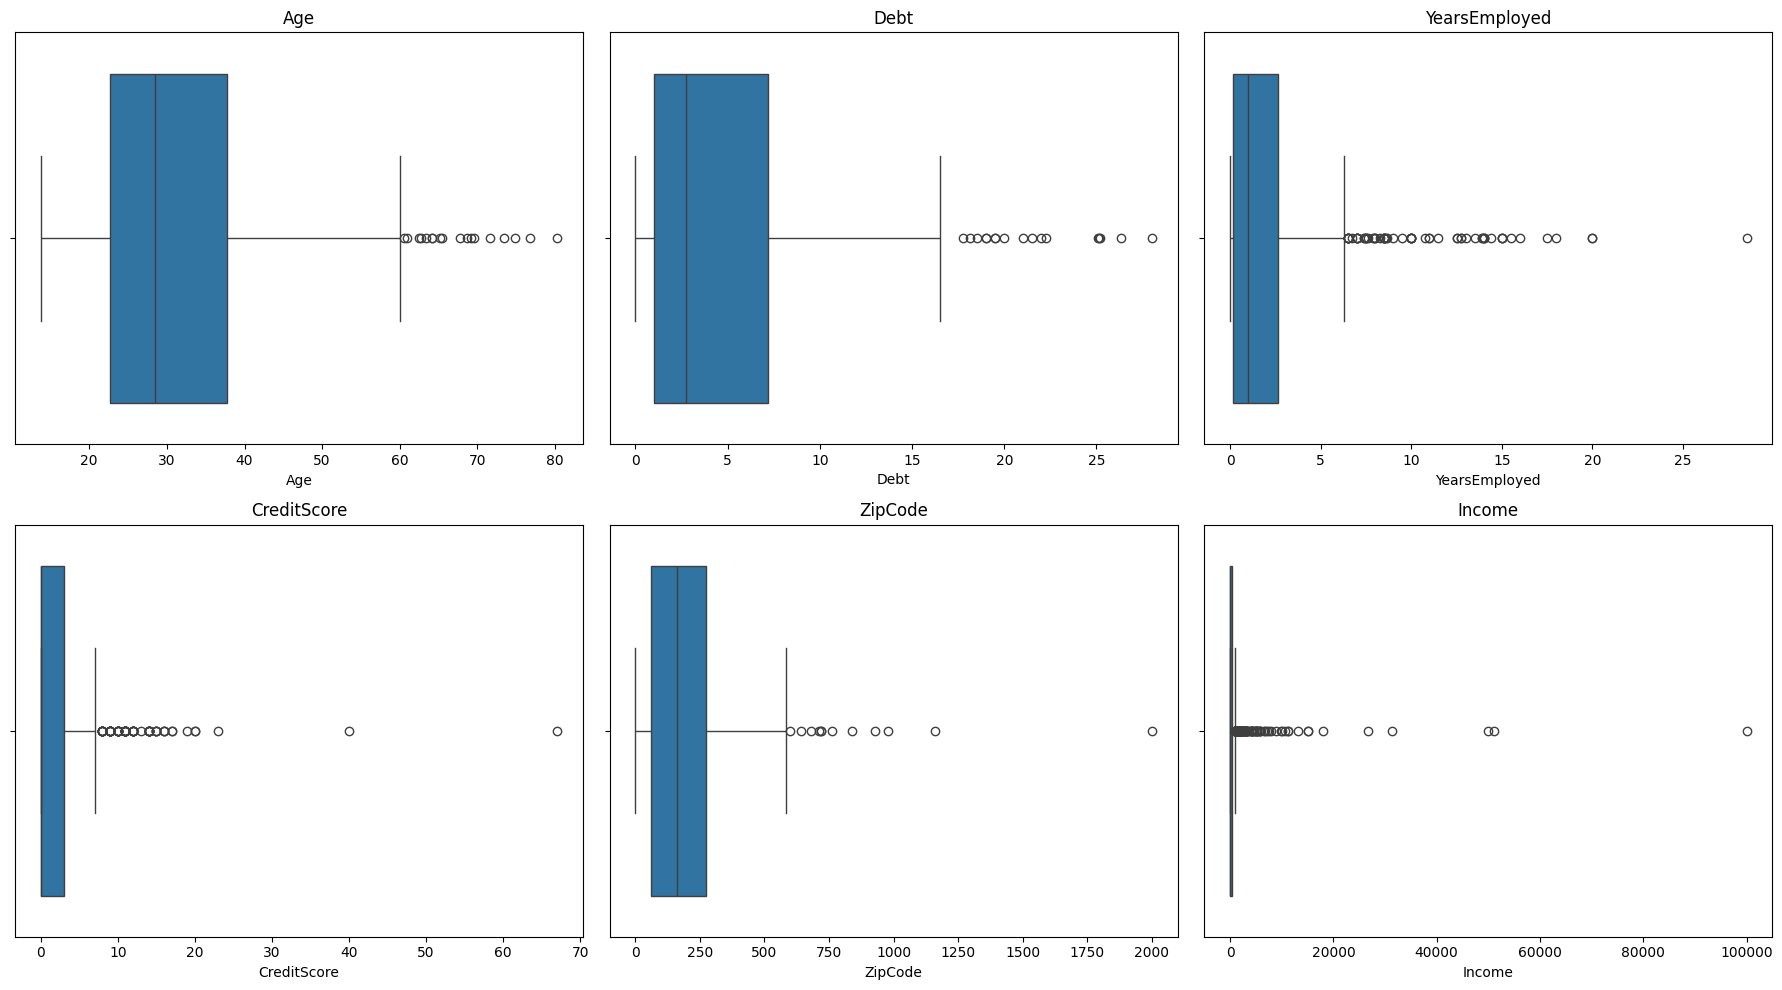

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
# Identify outliers using boxplots for numerical columns
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
numerical_columns = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(col)

plt.tight_layout()

Presence of Outliers: The box plots for numerical columns indicate the presence of outliers in several features:

-Age, Debt, YearsEmployed, CreditScore, and Income have outliers, suggesting that some entries have unusually high values compared to the rest of the data.
-ZipCode also shows a wide distribution, but as a categorical feature represented numerically, its "outliers" might actually represent less common categories.

In [9]:
import numpy as np
from scipy import stats
# Quantify outliers using Z-score for numerical columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum()

outliers

Gender             0
Age                9
Debt              10
Married            0
BankCustomer       0
YearsEmployed     22
PriorDefault       0
Employed           0
CreditScore        8
DriversLicense     0
ZipCode            9
Income             6
Approved           0
dtype: int64

As there is not much presence of outliers in the dataset and these outliers could represent some important relation with target variable, so we are ignoring them.

In [10]:
# Select only numeric columns for correlation analysis

numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
target_correlation = correlation_matrix['Approved'].sort_values()

target_correlation

ZipCode          -0.099598
Gender           -0.028934
DriversLicense    0.031625
Age               0.164086
Income            0.175657
Married           0.180583
BankCustomer      0.188964
Debt              0.206294
YearsEmployed     0.322475
CreditScore       0.406410
Employed          0.458301
PriorDefault      0.720407
Approved          1.000000
Name: Approved, dtype: float64

Feature Correlation
The correlation analysis with the target variable Approved highlights several features with varying degrees of association. Notably, PriorDefault shows the strongest positive correlation with approval status, indicating its potential importance in classification. This is followed by Employed, CreditScore, and YearsEmployed, which also show significant positive correlations.
On the other hand, features like ZipCode, Gender, and DriversLicense have very low correlation with the target variable, suggesting they may have limited predictive power.

**NOTE** Before moving further, we have to add analysis we done on data for dataset submission.


Given the insights from the detailed analysis, we should consider the nature of each categorical feature:

1. **`Industry`, `Ethnicity`, `Citizen`**: These features likely have no intrinsic order that relates to the target variable, making one-hot encoding a suitable choice to preserve their information without implying any unintended order.

2. **`Gender`, `Married`, `BankCustomer`, `PriorDefault`, `Employed`, `DriversLicense`**: These are already binary or have been treated as such, so no additional encoding is needed for them.

3. **`ZipCode`**: The analysis pointed out its minimal correlation with the target variable and its representation as a numerical feature, despite being categorical. Given its limited predictive utility we are excluding it based on its minimal correlation with the approval status.

In [11]:
#Let's perform one-hot encoding on these features and prepare the dataset for the next steps.
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


# Selecting categorical columns for one-hot encoding
categorical_columns = ['Industry', 'Ethnicity', 'Citizen']

# Applying OneHotEncoder without specifying `sparse`
encoder = OneHotEncoder()
encoded_features_sparse = encoder.fit_transform(df[categorical_columns])

# Converting to dense array manually if needed
encoded_features = encoded_features_sparse.toarray()

# Creating a DataFrame with the encoded features
# Correctly generating column names
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Dropping the original categorical columns and 'ZipCode' from the dataset
df_reduced = df.drop(categorical_columns + ['ZipCode'], axis=1)

# Ensuring indices align for concatenation
df_reduced.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenating the encoded features with the rest of the dataset
df_encoded = pd.concat([df_reduced, encoded_df], axis=1)

# Showing the new dataset structure
print(df_encoded.head())


   Gender    Age   Debt  Married  BankCustomer  YearsEmployed  PriorDefault  \
0       1  30.83  0.000        1             1           1.25             1   
1       0  58.67  4.460        1             1           3.04             1   
2       0  24.50  0.500        1             1           1.50             1   
3       1  27.83  1.540        1             1           3.75             1   
4       1  20.17  5.625        1             1           1.71             1   

   Employed  CreditScore  DriversLicense  ...  Industry_Transport  \
0         1            1               0  ...                 0.0   
1         1            6               0  ...                 0.0   
2         0            0               0  ...                 0.0   
3         1            5               1  ...                 0.0   
4         0            0               0  ...                 0.0   

   Industry_Utilities  Ethnicity_Asian  Ethnicity_Black  Ethnicity_Latino  \
0                 0.0            

With the encoding complete, we can move on to **Feature Selection**. Given the insights from the previous data analysis, we know that `PriorDefault`, `Employed`, `CreditScore`, and `YearsEmployed` are particularly correlated with the target variable, `Approved`. On the other hand, `Gender` and `DriversLicense` showed minimal correlation, suggesting they might be less critical for inclusion in the model.

For feature selection, we can take a two approach:
1. **Manual Selection**
2. **Automated Feature Selection Techniques**

Let's start with Feature Importance from a Random Forest model to get an initial ranking of features based on their importance. The aim is to understand the relative importance of each feature in predicting the target.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separating the features and the target variable
X = df_encoded.drop('Approved', axis=1)
y = df_encoded['Approved']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf.fit(X_train, y_train)

# Getting feature importances
feature_importances = rf.feature_importances_

# Creating a DataFrame to visualize the feature importances
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

features_df

,Feature,Importance
6,PriorDefault,0.272721
8,CreditScore,0.094100
5,YearsEmployed,0.093720
10,Income,0.091312
2,Debt,0.090295
1,Age,0.077554
7,Employed,0.063219
26,Ethnicity_Black,0.017263
9,DriversLicense,0.015718
4,BankCustomer,0.013520


The Random Forest model has provided us with an empirical ranking of feature importance for predicting the credit card application approval status. Here are some key insights:

- The outcome supports the initial analysis that identified `PriorDefault`, `Employed`, `CreditScore`, and `YearsEmployed` as significant predictors.
- The importance of `Income` and `Debt` also highlights the relevance of financial stability indicators in the approval process.
- The relatively lower importance of demographic features (`Gender`, `DriversLicense`) aligns with the minimal correlation observed earlier, suggesting they might be less critical for inclusion.

Considering these insights, a combination of high-importance features identified through this automated process, supplemented by manual judgment, we are selecting the following features for model training.

1. PriorDefault
2. CreditScore
3. YearsEmployed
4. Income
5. Debt
6. Age
7. Employed
8. Approved

In [13]:
# Refining the dataset to include only the selected top features and the target variable
selected_features = ['PriorDefault', 'CreditScore', 'YearsEmployed', 'Income', 'Debt', 'Age', 'Employed', 'Approved']
df_refined = df_encoded[selected_features]

df_refined.head()

,PriorDefault,CreditScore,YearsEmployed,Income,Debt,Age,Employed,Approved
0,1,1,1.25,0,0.000,30.83,1,1
1,1,6,3.04,560,4.460,58.67,1,1
2,1,0,1.50,824,0.500,24.50,0,1
3,1,5,3.75,3,1.540,27.83,1,1
4,1,0,1.71,0,5.625,20.17,0,1


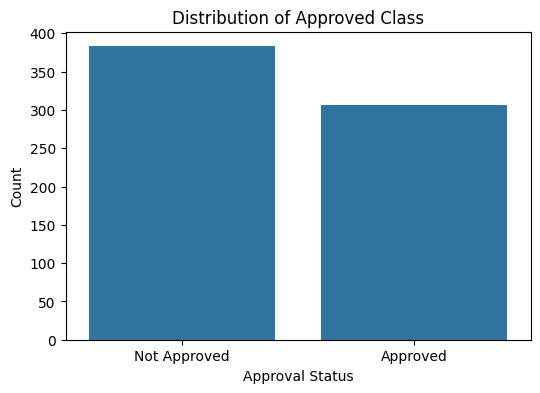

Approved
0    0.555072
1    0.444928
Name: proportion, dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target class 'Approved'
plt.figure(figsize=(6, 4))
sns.countplot(x='Approved', data=df_refined)
plt.title('Distribution of Approved Class')
plt.xlabel('Approval Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.show()

# Calculating the distribution of the target class
class_distribution = df_refined['Approved'].value_counts(normalize=True)
class_distribution

The target class Approved shows a relatively balanced distribution with approximately 55.5% of the cases being "Not Approved" and 44.5% "Approved". This balance is beneficial as it suggests that our dataset doesn't suffer from severe class imbalance, which can sometimes lead to challenges in model training and evaluation.

**Handling Skewness**

To address the skewness in the numerical features (`CreditScore`, `YearsEmployed`, `Income`, `Debt`, and `Age`), we'll consider applying transformations that can help normalize their distributions. 

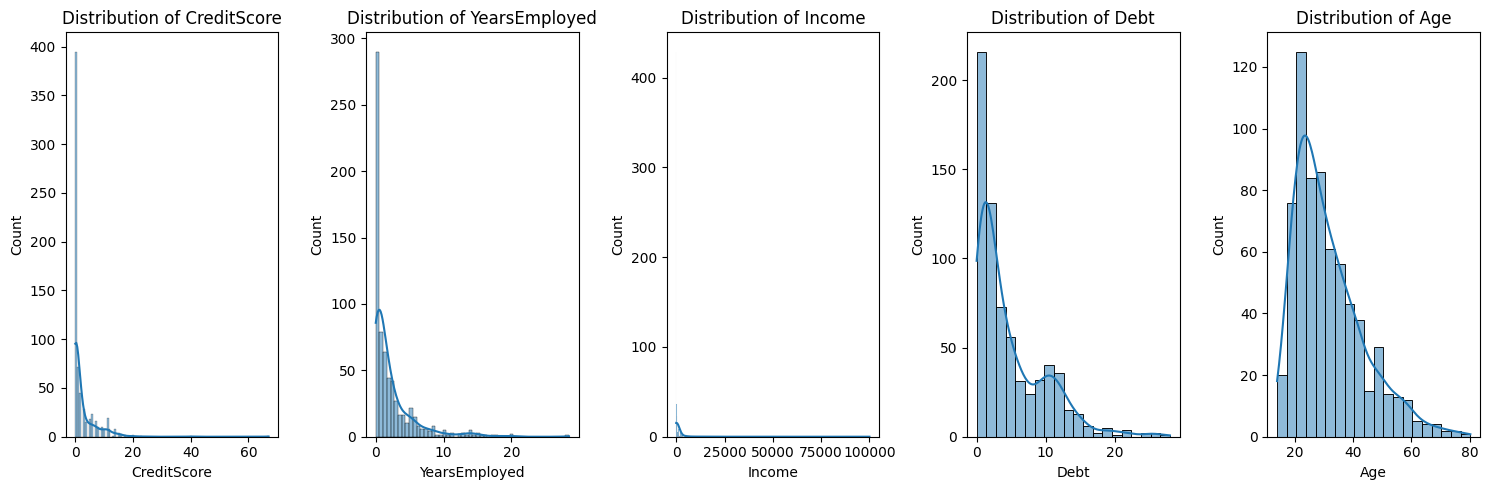

CreditScore       5.152520
YearsEmployed     2.891330
Income           13.140655
Debt              1.488813
Age               1.167304
dtype: float64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assessing skewness in the numerical features
numerical_features = ['CreditScore', 'YearsEmployed', 'Income', 'Debt', 'Age']

# Plotting distributions for each numerical feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 5, i)
    sns.histplot(df_refined[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Calculating skewness values
skewness_values = df_refined[numerical_features].skew()
skewness_values


Given the high skewness values, we'll apply a log transformation, keeping in mind that it requires adding a small constant to values to handle zeros.

Let's apply the log transformation to `CreditScore`, `YearsEmployed`, `Income`, `Debt`, and `Age` and then assess the effect on their distributions.

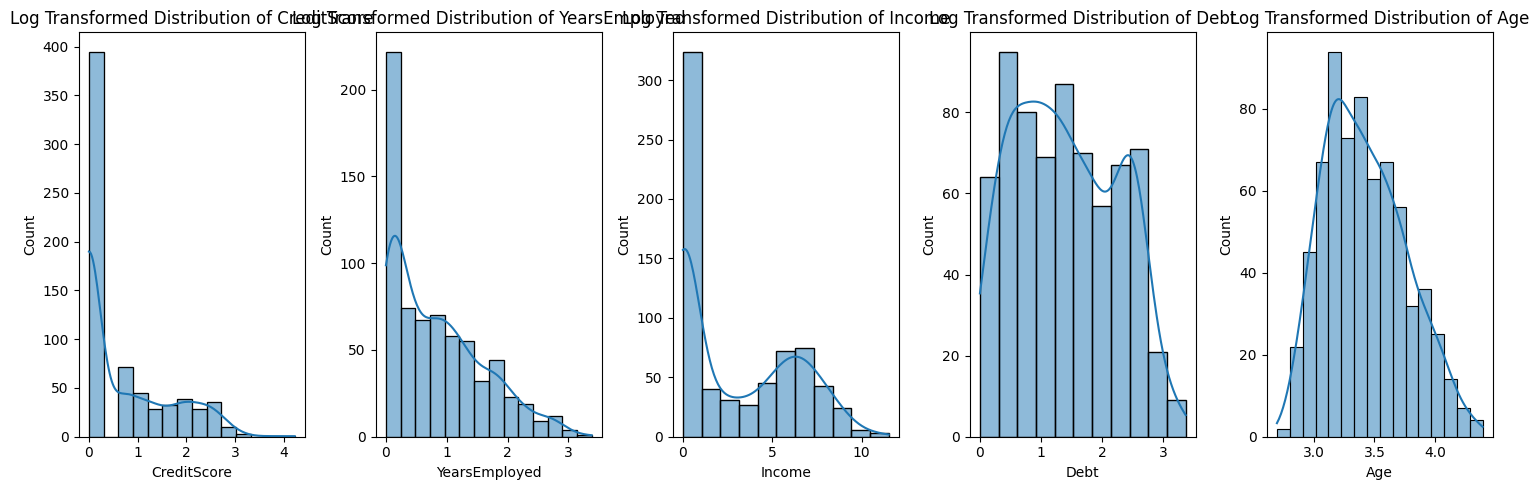

CreditScore      1.050913
YearsEmployed    0.819682
Income           0.510398
Debt             0.172507
Age              0.424104
dtype: float64

In [16]:
import numpy as np

# Applying log transformation with a small constant to handle zero values
df_transformed = df_refined.copy()
df_transformed['CreditScore'] = np.log(df_transformed['CreditScore'] + 1)
df_transformed['YearsEmployed'] = np.log(df_transformed['YearsEmployed'] + 1)
df_transformed['Income'] = np.log(df_transformed['Income'] + 1)
df_transformed['Debt'] = np.log(df_transformed['Debt'] + 1)
df_transformed['Age'] = np.log(df_transformed['Age'] + 1)

# Plotting distributions after log transformation
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 5, i)
    sns.histplot(df_transformed[feature], kde=True)
    plt.title(f'Log Transformed Distribution of {feature}')
plt.tight_layout()
plt.show()

# Calculating new skewness values
new_skewness_values = df_transformed[numerical_features].skew()
new_skewness_values

After applying log transformations to `CreditScore`, `YearsEmployed`, and `Income`, `Debt`, and `Age` we observe a notable improvement in their distributions:

- **CreditScore**: Skewness reduced from 5.15 to 1.05.
- **YearsEmployed**: Skewness reduced from 2.89 to 0.82.
- **Income**: Skewness reduced from 13.14 to 0.51.
- **Debt**: Skewness reduced from 1.48 to 0.17.
- **Age**: Skewness reduced from 1.17 to 0.42.

These transformations have significantly mitigated the skewness, bringing the distributions closer to normal.

With the skewness addressed, the next step is to normalize these features to ensure they're on a similar scale, enhancing the SVM model's learning efficiency. We'll use Min-Max scaling to transform the features into a range [0, 1], ensuring that no single feature dominates due to its scale.

Let's proceed with normalizing the numerical features. ​

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Selecting the numerical features for scaling
features_to_scale = ['CreditScore', 'YearsEmployed', 'Income', 'Debt', 'Age']

# Applying Min-Max scaling
df_transformed[features_to_scale] = scaler.fit_transform(df_transformed[features_to_scale])

# Showing the scaled features
df_transformed.head()


,PriorDefault,CreditScore,YearsEmployed,Income,Debt,Age,Employed,Approved
0,1,0.164272,0.239609,0.000000,0.000000,0.450783,1,1
1,1,0.461170,0.412554,0.549792,0.504099,0.819080,1,1
2,1,0.000000,0.270740,0.583290,0.120413,0.320834,0,1
3,1,0.424637,0.460392,0.120412,0.276829,0.392767,1,1
4,1,0.000000,0.294573,0.000000,0.561534,0.211771,0,1


In [18]:
# We are saving the Preprocessed Data into CSV file
df_transformed.to_csv('../Datasets/preprocessed_data.csv', index=False)

print("Preprocessed Data has been saved successfully!")

Preprocessed Data has been saved successfully!
